In [4]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 21.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# Импортируем нужные библиотеки

import spacy  # библиотека для обработки текста на естественном языке (NLP)
import numpy as np  # библиотека для работы с массивами чисел
import matplotlib.pyplot as plt  # библиотека для построения графиков
from sklearn.decomposition import PCA  # метод понижения размерности данных (Principal Component Analysis)

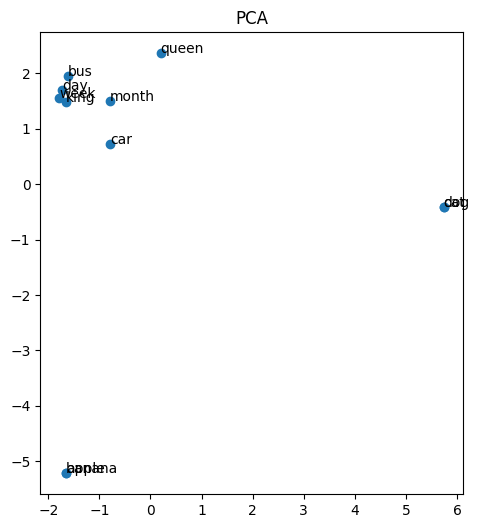

In [6]:

# Загружаем предобученную модель spacy с векторными представлениями слов.
# "en_core_web_md" — это английская модель среднего размера (medium), включающая Word Vectors (векторы слов)
nlp = spacy.load("en_core_web_md")

# Создаём список английских слов, которые мы хотим визуализировать.
# Эти слова относятся к разным категориям (животные, фрукты, транспорт, время, власть)
words = ["dog", "cat", "apple", "banana", "king", "queen", "car", "bus", "day", "week", "month"]

# Преобразуем каждое слово в его векторное представление.
# Каждое слово превращается в массив из примерно 300 чисел, которые описывают его смысл.
# Эти векторы создаются моделью spaCy на основе большого корпуса текстов.
word_vectors = np.array([nlp(word).vector for word in words])

# Используем PCA — метод понижения размерности.
# Исходно каждый вектор имеет ~300 признаков. Мы хотим уменьшить до 2 признаков,
# чтобы можно было отобразить векторы на 2D-графике (ось X и ось Y).
pca = PCA(n_components=2)  # оставляем только 2 компоненты (наиболее важные направления данных)
word_vectors_pca = pca.fit_transform(word_vectors)  # применяем PCA и получаем двумерные координаты

# Начинаем рисовать график
plt.figure(figsize=(12, 6))  # задаём размер изображения: ширина 12, высота 6 дюймов

plt.subplot(1, 2, 1)  # создаём "подграфик" — 1 строка, 2 столбца, выбираем 1-й
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])  # рисуем точки на графике (x и y координаты)
# Для каждой точки подписываем её соответствующим словом
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))  # пишем слово рядом с точкой

# Задаём название графика
plt.title("PCA")
# Показываем готовую картинку
plt.show()

График хорошо показывает, что слова вроде указания времени, животных ,
фруктов сгруппировались между собой, это именно то, что нам нужно, ведь
они часто употребляются в похожем контексте.